Combine all file

In [ ]:
import os
import pandas as pd

def merge_csv_files(input_directory, output_file):
    all_files = [os.path.join(input_directory, f) for f in os.listdir(input_directory) if f.endswith('.csv')]
    
    # Read and concatenate all CSV files
    df_list = []
    for file in all_files:
        try:
            df = pd.read_csv(file)
            df_list.append(df)
        except Exception as e:
            print(f"Error reading {file}: {e}")
    
    if df_list:
        merged_df = pd.concat(df_list, ignore_index=True)
        merged_df.to_csv(output_file, index=False)
        print(f"Successfully merged {len(all_files)} files into {output_file}")
    else:
        print("No CSV files found in the directory.")

# Update this path to the correct directory on your system
input_directory = "/Users/bocai/Desktop/SIOT/Analysis"  # Replace with the actual path to your folder containing CSV files
output_file = "Data.csv"  # Specify the output file name

merge_csv_files(input_directory, output_file)


Successfully merged 10 files into Data.csv


State-wise Statistics:
               EAR_Mean   EAR_Std  Speed_Mean   Speed_Std  Blink_Mean  \
State                                                                   
Fatigue        0.226803  0.020494  186.964760  319.701165  755.195585   
Focus          0.286524  0.023436   69.084906   42.930221  490.450651   
Loss of Focus  0.290424  0.029008  343.238708  294.725813  539.341018   

                Blink_Std  
State                      
Fatigue        778.749514  
Focus          564.996215  
Loss of Focus  580.011374  


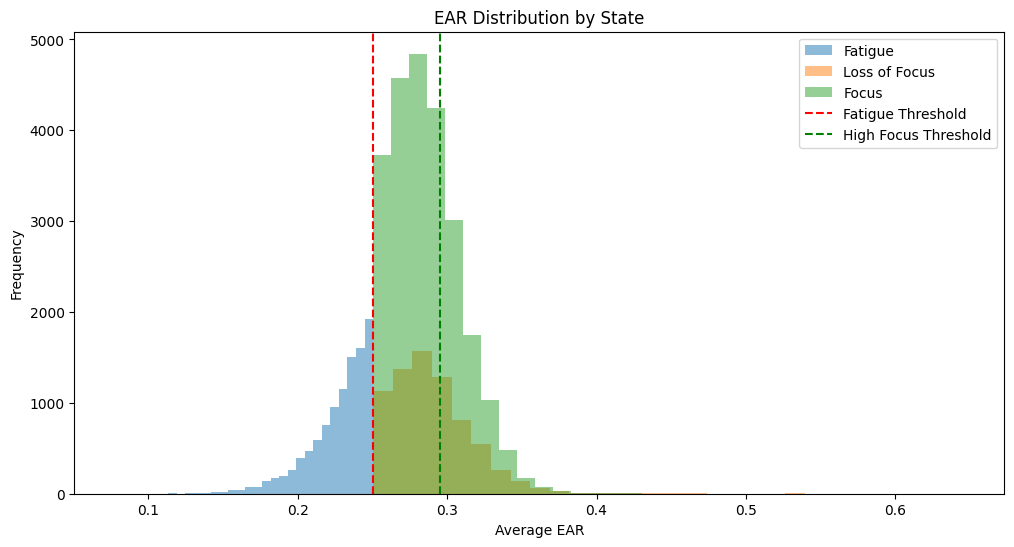

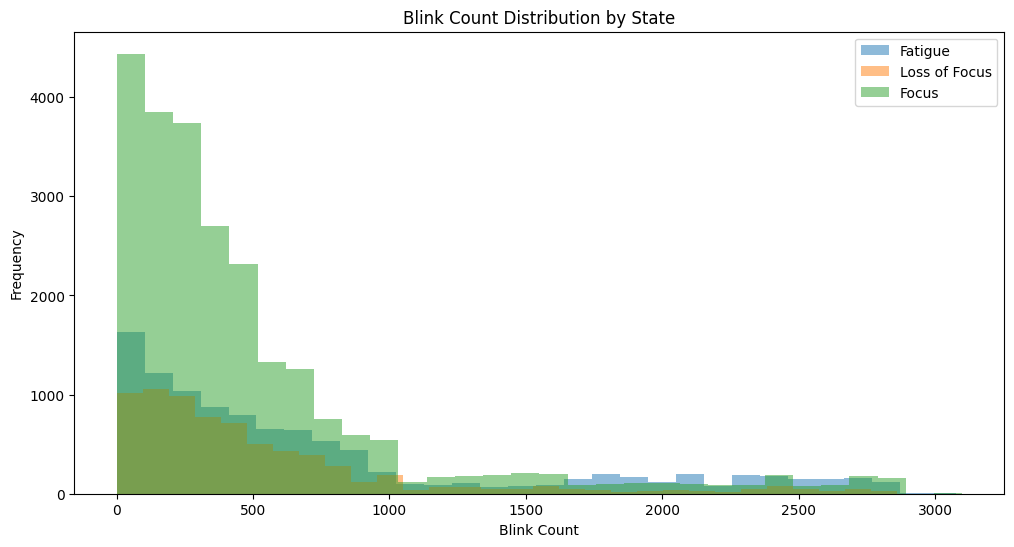

In [3]:
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('Data.csv')
# Define thresholds
EAR_LOW = data["Average EAR"].quantile(0.25)  # Fatigue threshold
EAR_HIGH = data["Average EAR"].quantile(0.75)  # High focus threshold
SPEED_THRESHOLD = 100  # Arbitrary threshold for fast eye movement

# Categorize states
def categorize_state(row):
    if row["Average EAR"] < EAR_LOW:
        return "Fatigue"
    elif row["Left Speed"] > SPEED_THRESHOLD or row["Right Speed"] > SPEED_THRESHOLD:
        return "Loss of Focus"
    else:
        return "Focus"

data["State"] = data.apply(categorize_state, axis=1)

# Analyze EAR and Speed Ranges by State
state_stats = data.groupby("State").agg(
    EAR_Mean=("Average EAR", "mean"),
    EAR_Std=("Average EAR", "std"),
    Speed_Mean=("Left Speed", lambda x: np.mean(x + data["Right Speed"])),
    Speed_Std=("Left Speed", lambda x: np.std(x + data["Right Speed"])),
    Blink_Mean=("Blink Count", "mean"),
    Blink_Std=("Blink Count", "std"),
)

print("State-wise Statistics:")
print(state_stats)

# Visualize EAR Distribution by State
plt.figure(figsize=(12, 6))
for state in data["State"].unique():
    subset = data[data["State"] == state]
    plt.hist(subset["Average EAR"], bins=30, alpha=0.5, label=state)
plt.axvline(EAR_LOW, color="r", linestyle="--", label="Fatigue Threshold")
plt.axvline(EAR_HIGH, color="g", linestyle="--", label="High Focus Threshold")
plt.title("EAR Distribution by State")
plt.xlabel("Average EAR")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Visualize Blink Count by State
plt.figure(figsize=(12, 6))
for state in data["State"].unique():
    subset = data[data["State"] == state]
    plt.hist(subset["Blink Count"], bins=30, alpha=0.5, label=state)
plt.title("Blink Count Distribution by State")
plt.xlabel("Blink Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 41441 entries, 0 to 41690
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    41441 non-null  object 
 1   Left Eye X   41441 non-null  float64
 2   Left Eye Y   41441 non-null  float64
 3   Right Eye X  41441 non-null  float64
 4   Right Eye Y  41441 non-null  float64
 5   Left Speed   41441 non-null  float64
 6   Right Speed  41441 non-null  float64
 7   Average EAR  41441 non-null  float64
 8   Blink Count  41441 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.2+ MB
None
Cleaned Data Summary:
         Left Eye X    Left Eye Y   Right Eye X   Right Eye Y    Left Speed  \
count  41441.000000  41441.000000  41441.000000  41441.000000  41441.000000   
mean    1143.321445    652.399025    879.017471    659.886151     73.686627   
std      142.661292    117.566247    131.502532    120.794302    119.170195   
min      114.000000  

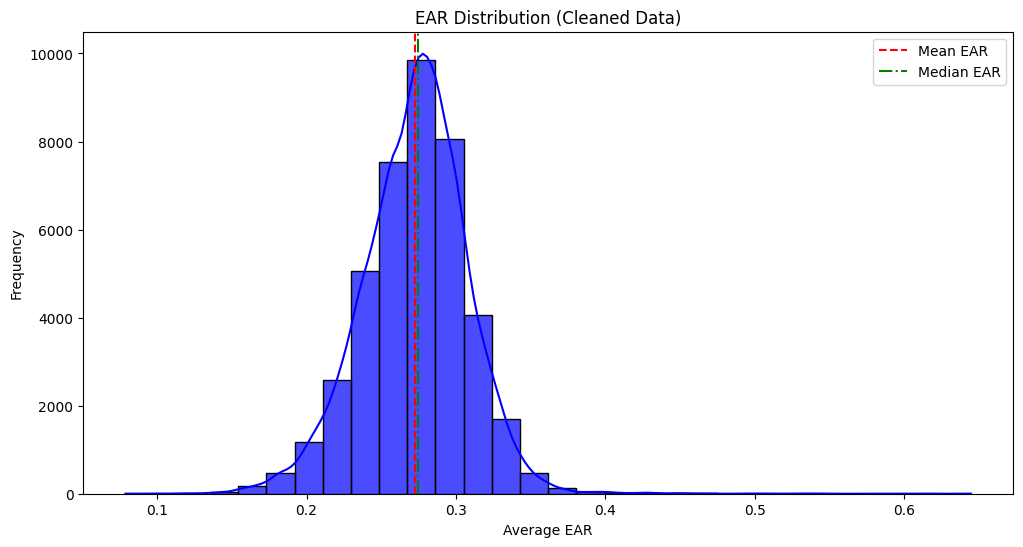

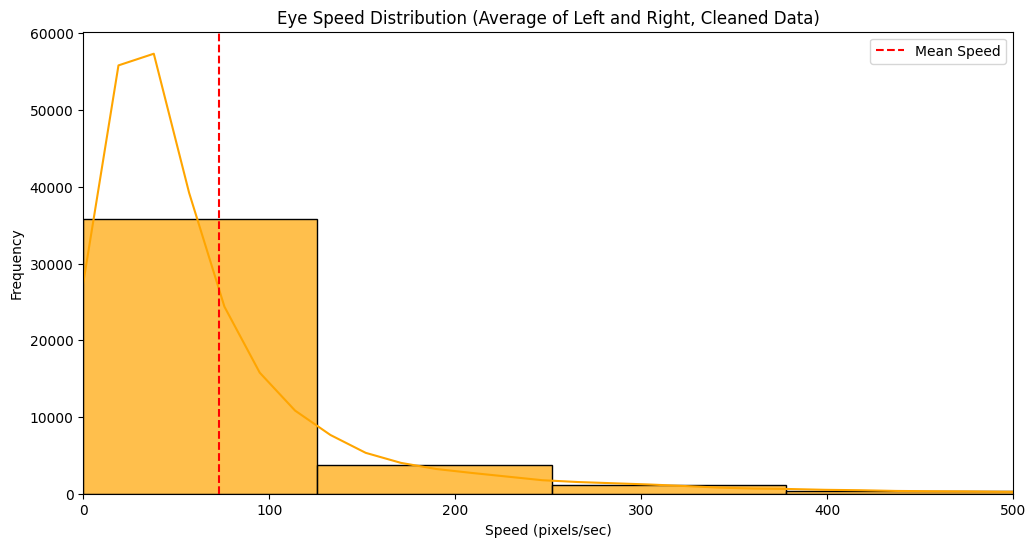

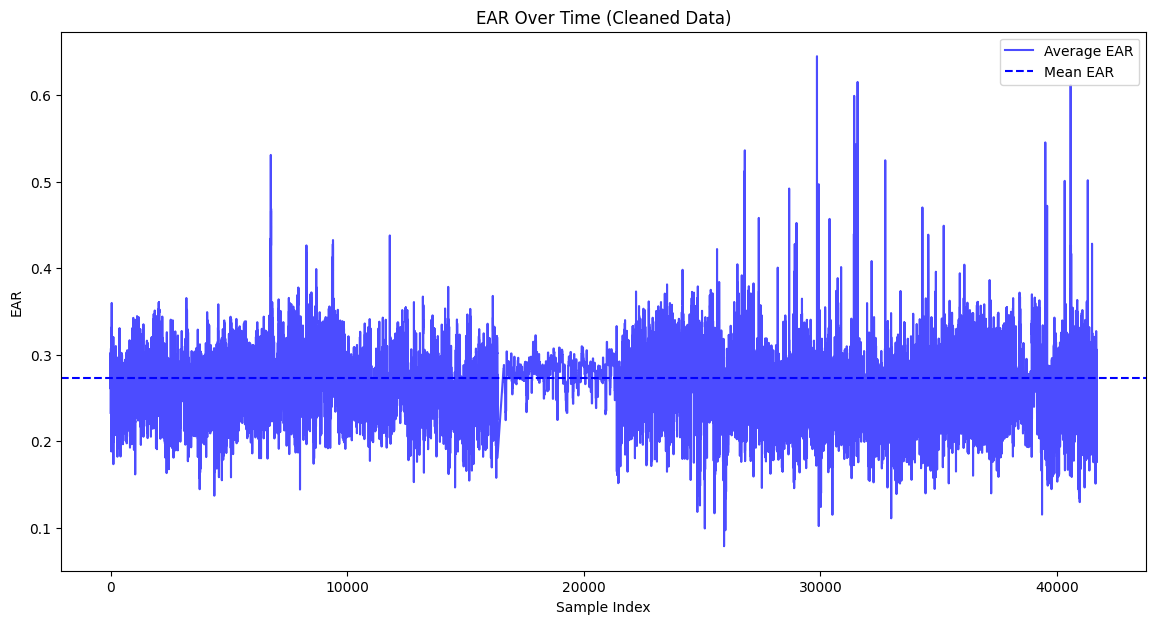

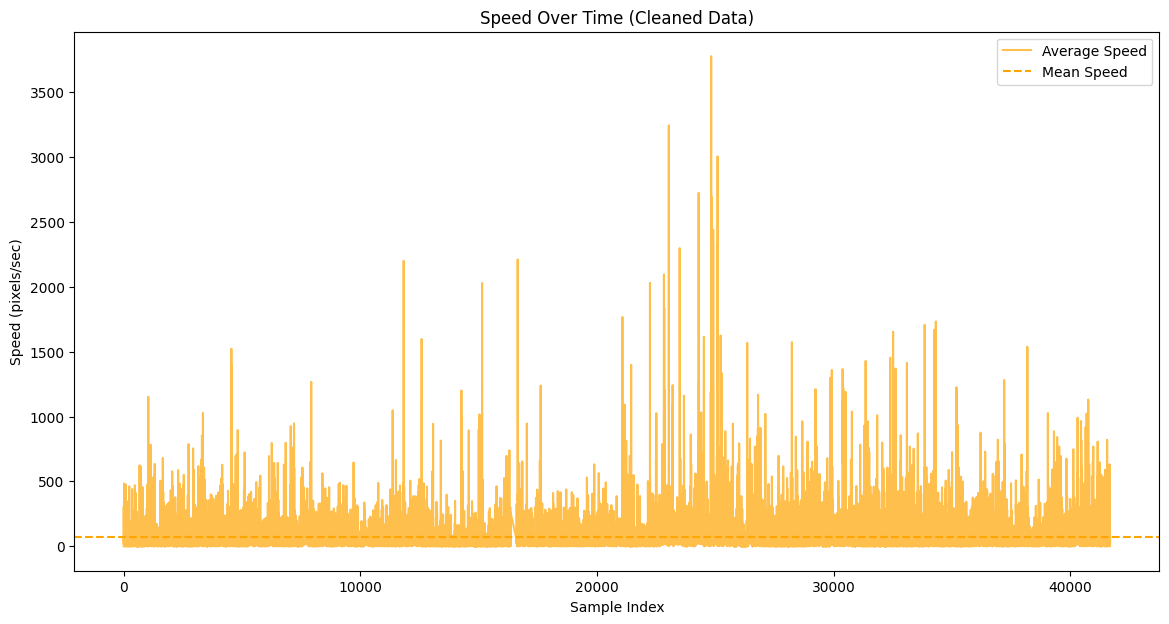

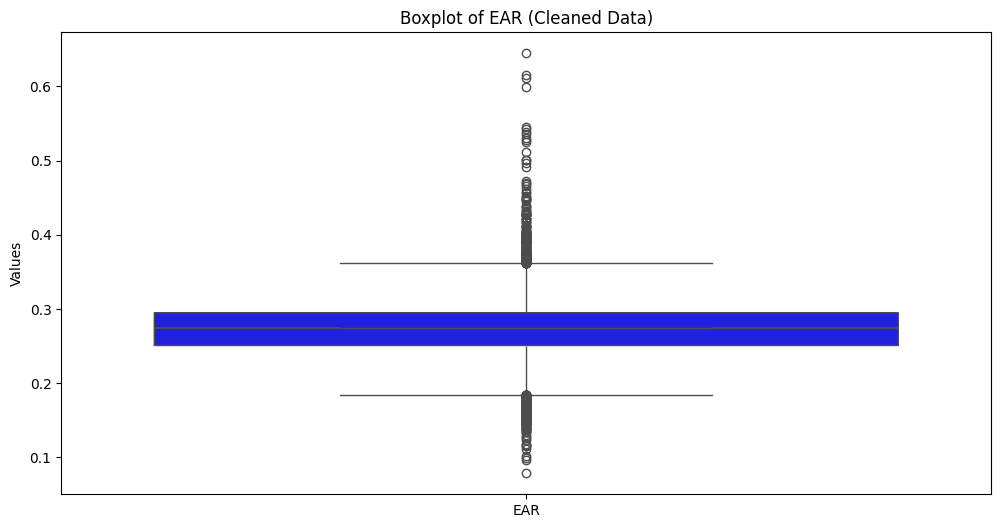

/var/folders/_w/drxqm65113nbt_zr_n8wncqc0000gn/T/ipykernel_3622/1499099148.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data[['Left Speed', 'Right Speed']].mean(axis=1), palette=['orange'], notch=True)


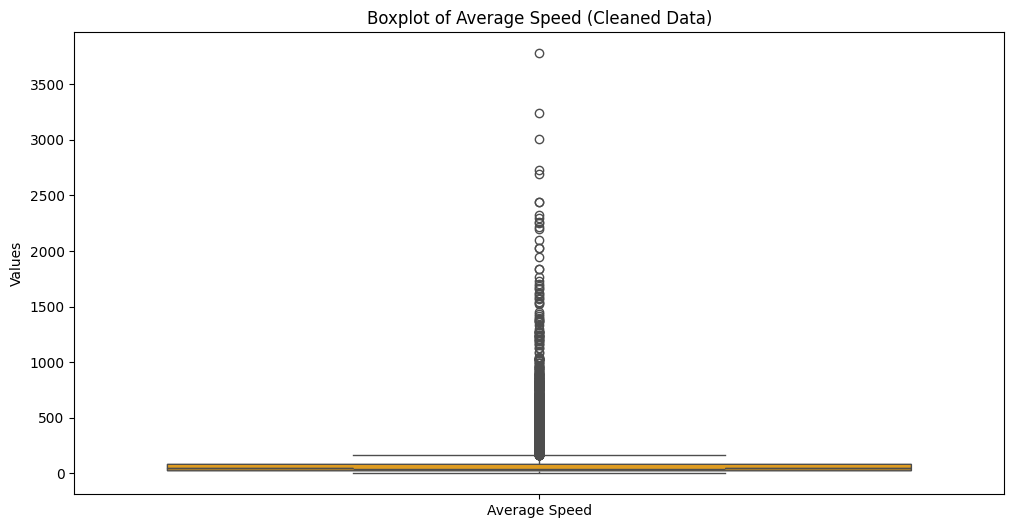

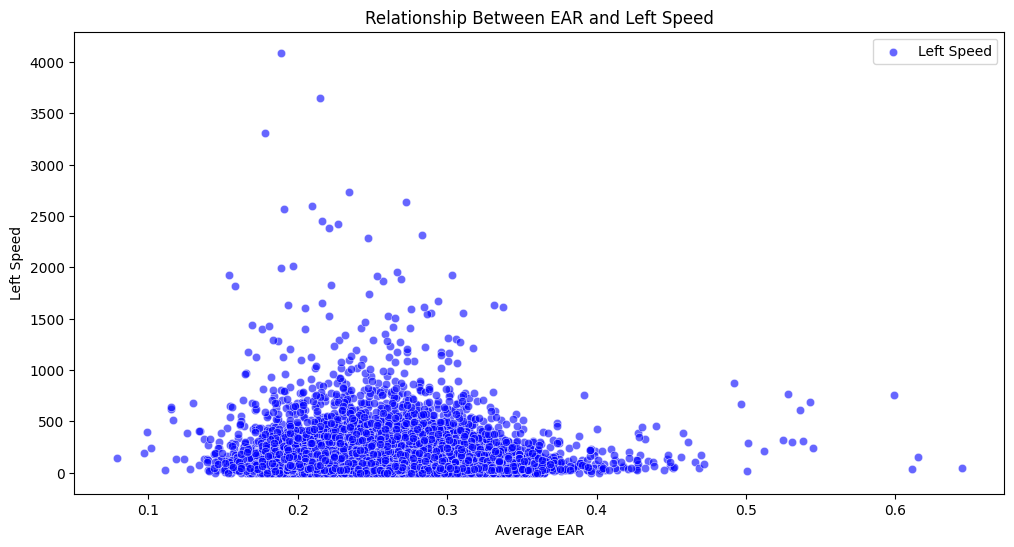

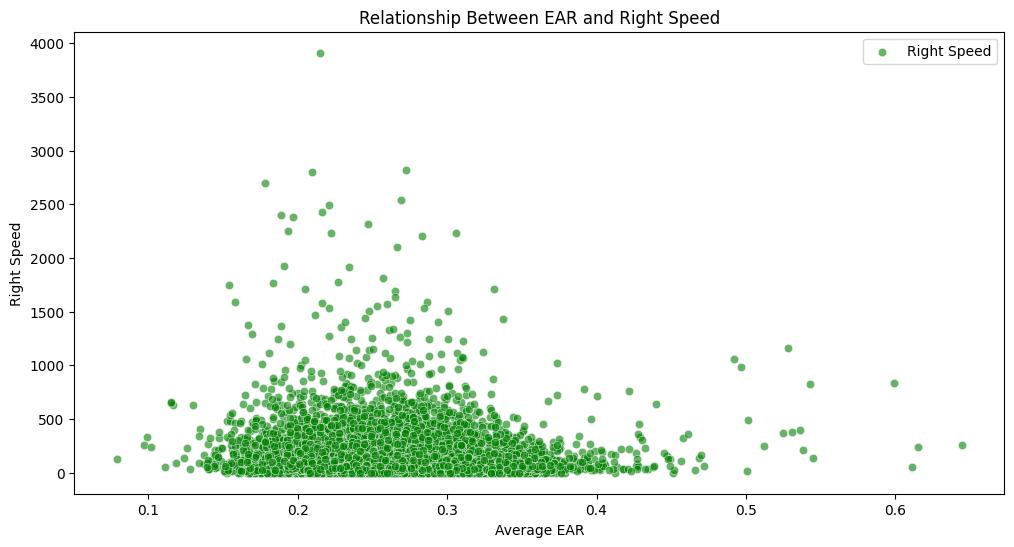

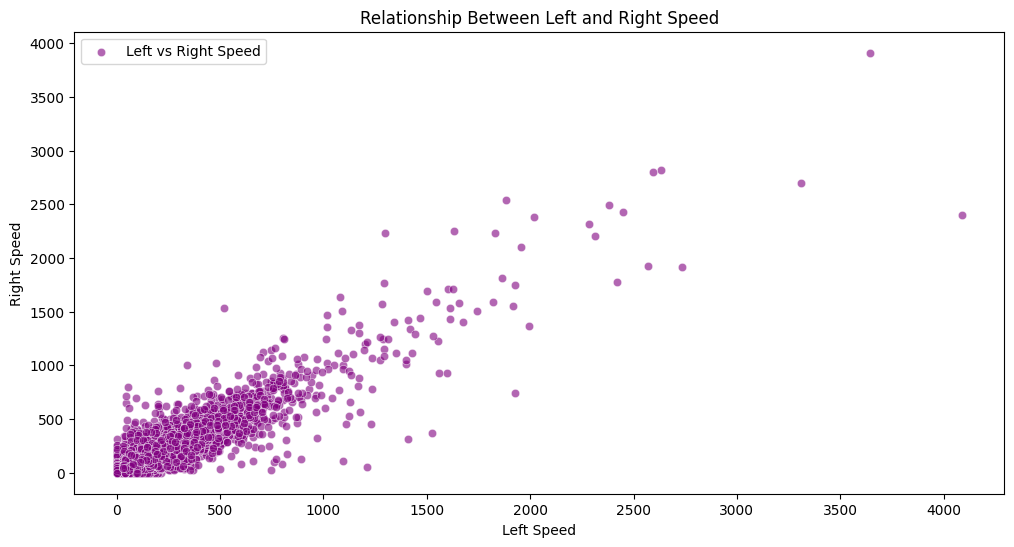

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Data.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values in critical columns
cleaned_data = data.dropna(subset=['Average EAR', 'Left Speed', 'Right Speed'])

# Confirm the cleaning process
print("Cleaned Data Info:")
print(cleaned_data.info())

# Basic statistics after cleaning
cleaned_data_summary = cleaned_data.describe()
print("Cleaned Data Summary:")
print(cleaned_data_summary)

# Plot EAR Distribution
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_data['Average EAR'], kde=True, bins=30, color='blue', alpha=0.7)
plt.axvline(cleaned_data['Average EAR'].mean(), color='red', linestyle='--', label='Mean EAR')
plt.axvline(cleaned_data['Average EAR'].median(), color='green', linestyle='-.', label='Median EAR')
plt.title("EAR Distribution (Cleaned Data)")
plt.xlabel("Average EAR")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot Speed Distribution with a smaller x-axis range
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_data[['Left Speed', 'Right Speed']].mean(axis=1), kde=True, bins=30, color='orange', alpha=0.7)
plt.axvline(cleaned_data[['Left Speed', 'Right Speed']].mean(axis=1).mean(), color='red', linestyle='--', label='Mean Speed')
plt.title("Eye Speed Distribution (Average of Left and Right, Cleaned Data)")
plt.xlabel("Speed (pixels/sec)")
plt.ylabel("Frequency")
plt.xlim(0, 500)  # Adjusted x-axis range for better detail
plt.legend()
plt.show()

# EAR Over Time
plt.figure(figsize=(14, 7))
plt.plot(cleaned_data['Average EAR'], label='Average EAR', color='blue', alpha=0.7)
plt.axhline(cleaned_data['Average EAR'].mean(), color='blue', linestyle='--', label='Mean EAR')
plt.title("EAR Over Time (Cleaned Data)")
plt.xlabel("Sample Index")
plt.ylabel("EAR")
plt.legend()
plt.show()

# Speed Over Time
plt.figure(figsize=(14, 7))
plt.plot(cleaned_data[['Left Speed', 'Right Speed']].mean(axis=1), label='Average Speed', color='orange', alpha=0.7)
plt.axhline(cleaned_data[['Left Speed', 'Right Speed']].mean(axis=1).mean(), color='orange', linestyle='--', label='Mean Speed')
plt.title("Speed Over Time (Cleaned Data)")
plt.xlabel("Sample Index")
plt.ylabel("Speed (pixels/sec)")
plt.legend()
plt.show()

# Boxplot of EAR
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data[['Average EAR']], palette=['blue'], notch=True)
plt.xticks([0], ['EAR'])
plt.title("Boxplot of EAR (Cleaned Data)")
plt.ylabel("Values")
plt.show()

# Boxplot of Speed
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data[['Left Speed', 'Right Speed']].mean(axis=1), palette=['orange'], notch=True)
plt.xticks([0], ['Average Speed'])
plt.title("Boxplot of Average Speed (Cleaned Data)")
plt.ylabel("Values")
plt.show()

# Pairplot of EAR and Speed relationships
plt.figure(figsize=(12, 6))
sns.scatterplot(x=cleaned_data['Average EAR'], y=cleaned_data['Left Speed'], color='blue', alpha=0.6, label='Left Speed')
plt.title("Relationship Between EAR and Left Speed")
plt.xlabel("Average EAR")
plt.ylabel("Left Speed")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=cleaned_data['Average EAR'], y=cleaned_data['Right Speed'], color='green', alpha=0.6, label='Right Speed')
plt.title("Relationship Between EAR and Right Speed")
plt.xlabel("Average EAR")
plt.ylabel("Right Speed")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=cleaned_data['Left Speed'], y=cleaned_data['Right Speed'], color='purple', alpha=0.6, label='Left vs Right Speed')
plt.title("Relationship Between Left and Right Speed")
plt.xlabel("Left Speed")
plt.ylabel("Right Speed")
plt.legend()
plt.show()


/var/folders/_w/drxqm65113nbt_zr_n8wncqc0000gn/T/ipykernel_3622/1279335412.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Blink Rate'] = cleaned_data['Blink Count'].diff().fillna(0) * 60  # Assuming data is captured per second
/var/folders/_w/drxqm65113nbt_zr_n8wncqc0000gn/T/ipykernel_3622/1279335412.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Fatigue State'] = (


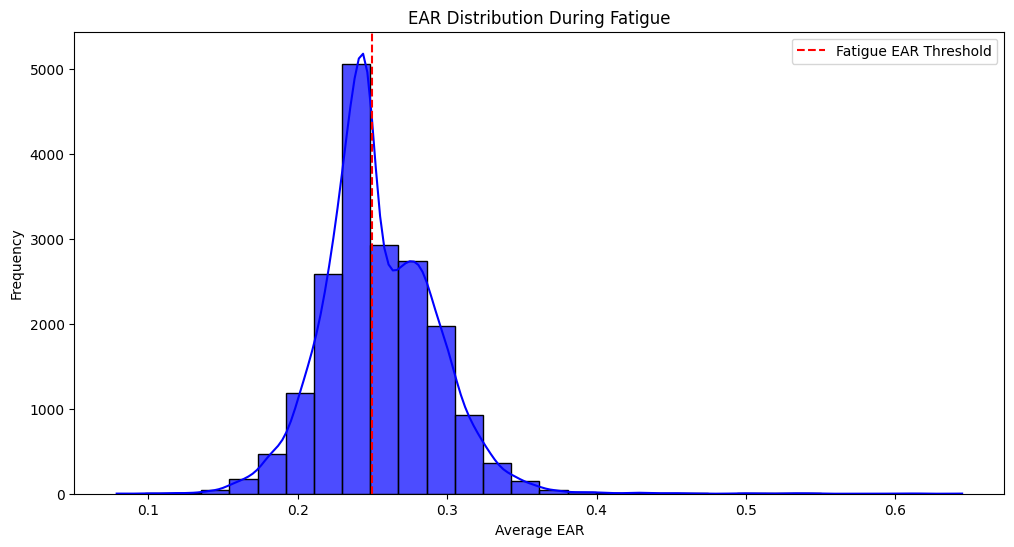

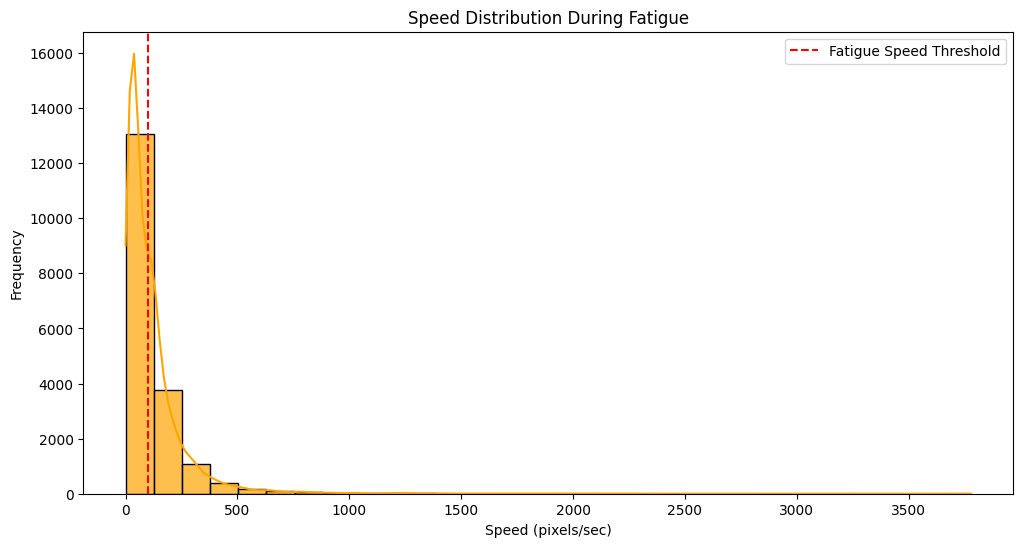

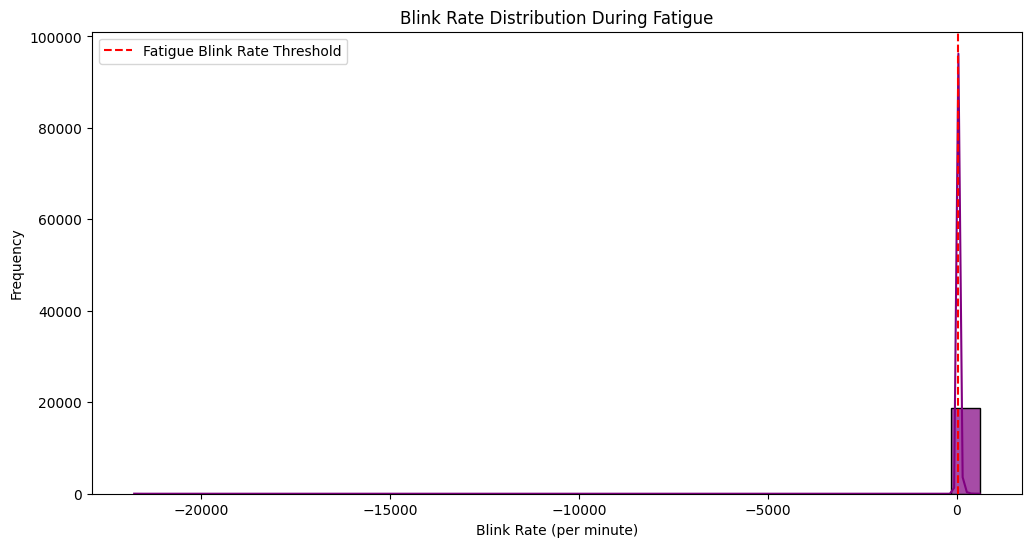

Fatigue Data Summary:
         Left Eye X    Left Eye Y   Right Eye X   Right Eye Y    Left Speed  \
count  18713.000000  18713.000000  18713.000000  18713.000000  18713.000000   
mean    1141.927216    650.115161    887.625608    656.425052    116.838303   
std      158.490444    121.004665    144.895285    125.106579    164.300835   
min      114.000000     32.000000    -77.000000     30.000000      0.000000   
25%     1065.000000    582.000000    804.000000    587.000000     30.335035   
50%     1146.000000    651.000000    883.000000    654.000000     68.106057   
75%     1228.000000    721.000000    970.000000    726.000000    146.973628   
max     1957.000000   1063.000000   1731.000000   1089.000000   4089.243214   

        Right Speed   Average EAR   Blink Count    Blink Rate  
count  18713.000000  18713.000000  18713.000000  18713.000000  
mean     114.979727      0.253685    677.448351     25.278683  
std      158.588327      0.037689    714.519684    175.017829  
min       

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = 'Data.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values in critical columns
cleaned_data = data.dropna(subset=['Average EAR', 'Left Speed', 'Right Speed', 'Blink Count'])

# Define thresholds for fatigue analysis
EAR_FATIGUE_THRESHOLD = 0.25  # Below this value, EAR indicates fatigue
SPEED_FATIGUE_THRESHOLD = 100  # Above this value, high speed indicates distraction
BLINK_FATIGUE_THRESHOLD = 15  # High blink rate indicates fatigue (per minute)

# Calculate blink rate per minute
cleaned_data['Blink Rate'] = cleaned_data['Blink Count'].diff().fillna(0) * 60  # Assuming data is captured per second

# Identify fatigue states based on thresholds
cleaned_data['Fatigue State'] = (
    (cleaned_data['Average EAR'] < EAR_FATIGUE_THRESHOLD) |
    (cleaned_data[['Left Speed', 'Right Speed']].mean(axis=1) > SPEED_FATIGUE_THRESHOLD) |
    (cleaned_data['Blink Rate'] > BLINK_FATIGUE_THRESHOLD)
)

# Filter data where fatigue state is true
fatigue_data = cleaned_data[cleaned_data['Fatigue State']]

# Summarize fatigue characteristics
fatigue_summary = fatigue_data.describe()

# Visualize EAR Distribution During Fatigue
plt.figure(figsize=(12, 6))
sns.histplot(fatigue_data['Average EAR'], kde=True, bins=30, color='blue', alpha=0.7)
plt.axvline(EAR_FATIGUE_THRESHOLD, color='red', linestyle='--', label='Fatigue EAR Threshold')
plt.title("EAR Distribution During Fatigue")
plt.xlabel("Average EAR")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Visualize Speed Distribution During Fatigue
plt.figure(figsize=(12, 6))
sns.histplot(fatigue_data[['Left Speed', 'Right Speed']].mean(axis=1), kde=True, bins=30, color='orange', alpha=0.7)
plt.axvline(SPEED_FATIGUE_THRESHOLD, color='red', linestyle='--', label='Fatigue Speed Threshold')
plt.title("Speed Distribution During Fatigue")
plt.xlabel("Speed (pixels/sec)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Visualize Blink Rate Distribution During Fatigue
plt.figure(figsize=(12, 6))
sns.histplot(fatigue_data['Blink Rate'], kde=True, bins=30, color='purple', alpha=0.7)
plt.axvline(BLINK_FATIGUE_THRESHOLD, color='red', linestyle='--', label='Fatigue Blink Rate Threshold')
plt.title("Blink Rate Distribution During Fatigue")
plt.xlabel("Blink Rate (per minute)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Display the summary of fatigue data
print("Fatigue Data Summary:")
print(fatigue_summary)


Dynamic EAR Fatigue Threshold (10th Percentile): 0.2279987081873886


/var/folders/_w/drxqm65113nbt_zr_n8wncqc0000gn/T/ipykernel_3622/3395885311.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Fatigue State'] = (


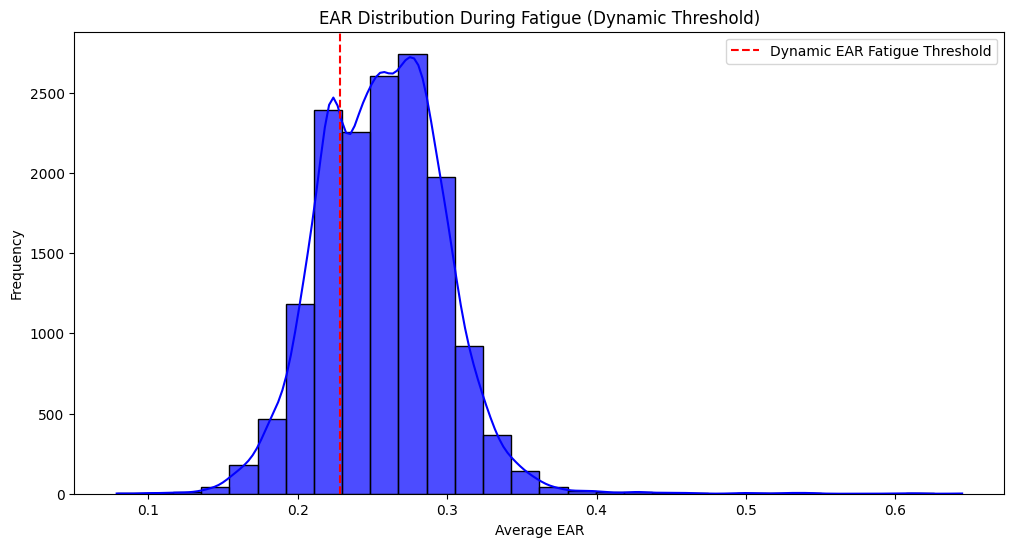

In [10]:
# Dynamically calculate EAR threshold for fatigue
EAR_FATIGUE_THRESHOLD = cleaned_data['Average EAR'].quantile(0.10)  # Use 10th percentile

# Define other thresholds
SPEED_FATIGUE_THRESHOLD = 100  # Speed threshold for fatigue
BLINK_FATIGUE_THRESHOLD = 15  # Blink rate threshold for fatigue

# Identify fatigue states based on updated thresholds
cleaned_data['Fatigue State'] = (
    (cleaned_data['Average EAR'] < EAR_FATIGUE_THRESHOLD) |
    (cleaned_data[['Left Speed', 'Right Speed']].mean(axis=1) > SPEED_FATIGUE_THRESHOLD) |
    (cleaned_data['Blink Rate'] > BLINK_FATIGUE_THRESHOLD)
)

# Filter data where fatigue state is true
fatigue_data = cleaned_data[cleaned_data['Fatigue State']]

# Summarize fatigue characteristics
fatigue_summary = fatigue_data.describe()

# Print new EAR fatigue threshold
print(f"Dynamic EAR Fatigue Threshold (10th Percentile): {EAR_FATIGUE_THRESHOLD}")

# Visualize EAR Distribution During Fatigue
plt.figure(figsize=(12, 6))
sns.histplot(fatigue_data['Average EAR'], kde=True, bins=30, color='blue', alpha=0.7)
plt.axvline(EAR_FATIGUE_THRESHOLD, color='red', linestyle='--', label='Dynamic EAR Fatigue Threshold')
plt.title("EAR Distribution During Fatigue (Dynamic Threshold)")
plt.xlabel("Average EAR")
plt.ylabel("Frequency")
plt.legend()
plt.show()


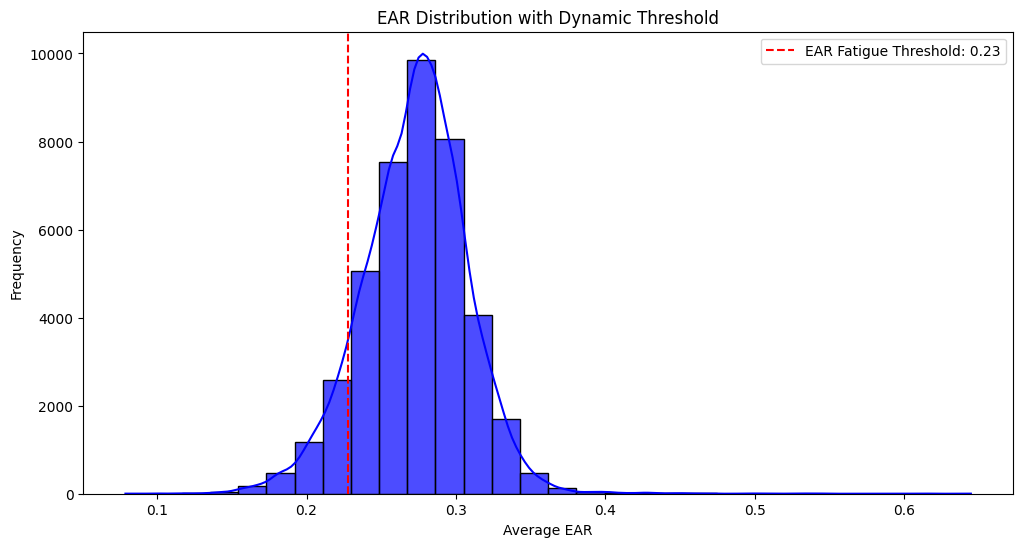

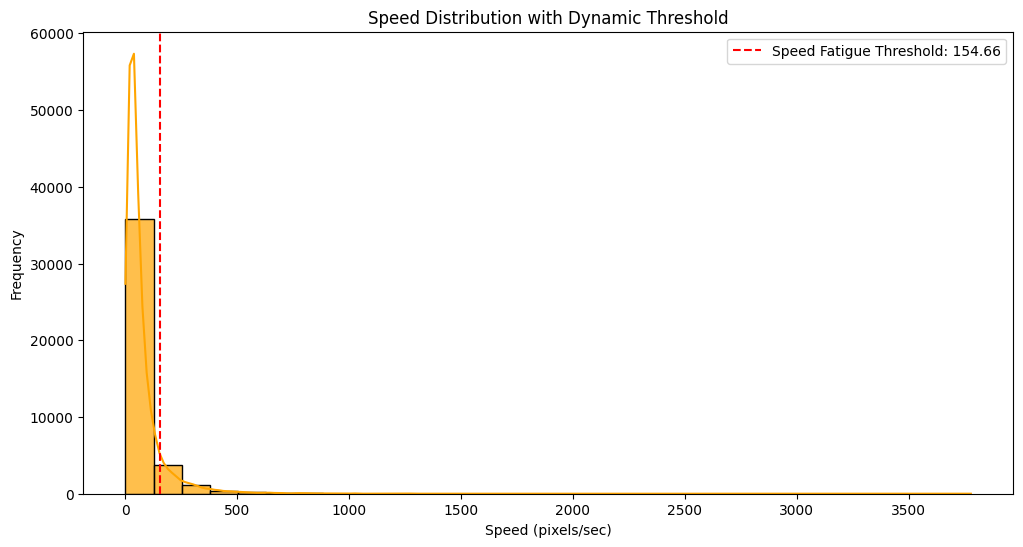

In [11]:
# Dynamically calculate thresholds
EAR_FATIGUE_THRESHOLD = cleaned_data['Average EAR'].quantile(0.10)  # 10th percentile for EAR
SPEED_FATIGUE_THRESHOLD = cleaned_data[['Left Speed', 'Right Speed']].mean(axis=1).quantile(0.90)  # 90th percentile for Speed

# EAR Progress Bar Threshold
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_data['Average EAR'], kde=True, bins=30, color='blue', alpha=0.7)
plt.axvline(EAR_FATIGUE_THRESHOLD, color='red', linestyle='--', label=f'EAR Fatigue Threshold: {EAR_FATIGUE_THRESHOLD:.2f}')
plt.title("EAR Distribution with Dynamic Threshold")
plt.xlabel("Average EAR")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Speed Progress Bar Threshold
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_data[['Left Speed', 'Right Speed']].mean(axis=1), kde=True, bins=30, color='orange', alpha=0.7)
plt.axvline(SPEED_FATIGUE_THRESHOLD, color='red', linestyle='--', label=f'Speed Fatigue Threshold: {SPEED_FATIGUE_THRESHOLD:.2f}')
plt.title("Speed Distribution with Dynamic Threshold")
plt.xlabel("Speed (pixels/sec)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
